# Titanic: Machine Learning from Disaster on Kaggle
***
This is a jupyter notebook for Titanic: Machine Learning from Disaster on Kaggle. The objective is to predict the passengers in test set are "Survived" or not. The process to achieve a goal is <br>
1. Data Exploration
2. Data visualization
3. Define parameters
4. Deal with missing values
5. Feature extraction
6. Dummy encoding
7. Relationship between features
8. Select features for training
9. Scaling
10. Train model using XGBoost
11. Predict test set

In [1]:
import pandas as pd
import numpy as np
import math

## 1) Data Exploration
***
Load the data and explore them. Our objective here is to get the basic understanding of data such as how many rows and columns, any missing values or explore the unique values in each columns. This will give us the knowledge to visualize and manipulate the data in next step.

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
combine = pd.concat([train.drop('Survived',1),test])

print('train data shape:', train.shape)
print('test data shape:', test.shape, '\n')

print('-----------------------------------------')
print('---------- Sample of DataFrame ----------')
print('-----------------------------------------')
display(train.head(5))

# See type of each column
print('\n')
print('-----------------------------------------')
print('See type of each column in train set')
print('-----------------------------------------')
display(train.dtypes)

# See number of unique values for each column
print('-----------------------------------------')
print('Number of Unique value of each column in train set')
print('-----------------------------------------')
print(train.nunique(),'\n')

# count null from each columns in train and test set
print('-----------------------------------------')
print('Number of "NaN" value of each column in train set')
print('-----------------------------------------')
print(train.isnull().sum())
print('-----------------------------------------')
print('Number of "NaN" value of each column in test set')
print('-----------------------------------------\n')
print(test.isnull().sum())

train data shape: (891, 12)
test data shape: (418, 11) 

-----------------------------------------
---------- Sample of DataFrame ----------
-----------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




-----------------------------------------
See type of each column in train set
-----------------------------------------


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-----------------------------------------
Number of Unique value of each column in train set
-----------------------------------------
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64 

-----------------------------------------
Number of "NaN" value of each column in train set
-----------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------------------------------------
Number of "NaN" value of each column in test set
-----------------------------------------

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0

The train data have 12 columns. "PassengerId" is just the index column of passenger. The next column "Survived" indicates this passenger survived (1) or not (0). The remianing columns is the important information about each passenger. Both sets have nan values in "Age" and "Cabin". The differents are train set has 2 missing values in "Embarked" and test set has 1 missing value in "Fare". The nan values in these column should be fill with the proper methodology.
Choosing columns likely to have a unique values to explore further.

In [3]:
print('Pclass unique values:', train['Pclass'].unique())
print('Sex unique values:', train['Sex'].unique())
print('SibSp unique values:', train['SibSp'].unique())
print('Parch unique values:', train['Parch'].unique())
print('Embarked unique values:', train['Embarked'].unique())

Pclass unique values: [3 1 2]
Sex unique values: ['male' 'female']
SibSp unique values: [1 0 3 4 2 5 8]
Parch unique values: [0 1 2 5 3 4 6]
Embarked unique values: ['S' 'C' 'Q' nan]


The data summary is

- "Pclass" is a ticket class. There are 3 values, 1-3 class.
- "Name" is the name and surname of each passenger in strings. Notice the title such as Mr. and Mrs.
- "Sex" is gender of passenger. The values are male and female.
- "Age" is age of passenger.
- "SibSp" is a number of sibling and spouse traveling with each passenger.
- "Parch" is a number of children and parents traveling with each passenger.
- "Ticket" is a character strings on ticket.
- "Fare" is a float number of amount each passenger paid to be on titanic.
- "Cabin" is a cabin number of each passenger in strings.
- "Embarked" is a port of embarkation. There are 3 values, 'S' 'C' 'Q'.

## 2) Data visualization
***
Here, we use some graph plot to get better understanding of our data. The graph will make us visualize what hidden behind the value in each column. We hope to find some trend and can apply this understanding to extract, create or drop some feature in next step. First we import the library to plot graph

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Create the dataframe. One for survived and the other for not survived titanic accident. Also define their color, blue for survived and red for not survived.

In [5]:
surv = train[train['Survived']==1]
no_surv = train[train['Survived']==0]

surv_color = "blue"
no_surv_color = "red"

Explore the data by plotting categorical features with bar plot and numerical features with histogram. Plot them versus the "Survived" column because this column is the output.

"sns.distplot" will plot a histogram of the nemerical features, here is "Age" and "Fare" versus frequent of each value. Blue is for survived and red is for not survived.  

"sns.barplot" will plot a bar of the choosing category column versus "Survived". The process is to count how many of the interest feature made "Survived" equal to 1 and divide by the number of this feature. The black lines on top of each bar are the size of confidence intervals to draw around estimated values.

Plot a graph for numerical features.

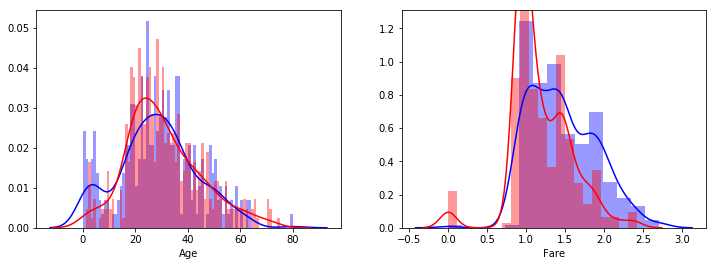

The survival age median is  28.0
The non-survival age median is  28.0


The survival fare median is  26.0
The non-survival fare median is  10.5


In [6]:
#Define the size of figure
plt.figure(figsize=[12,4])

plt.subplot(121)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color=surv_color)
sns.distplot(no_surv['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color=no_surv_color, axlabel='Age')
plt.subplot(122)
#If plotting "Fare" directly,  the tail of graph is too long (There are extreme numbers in data). We solve this by apply the np.log10 to the data first. 
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=True, color=surv_color)
sns.distplot(np.log10(no_surv['Fare'].dropna().values+1), kde=True, color=no_surv_color ,axlabel='Fare')

plt.show()

print("The survival age median is ", surv['Age'].dropna().median())
print("The non-survival age median is ", no_surv['Age'].dropna().median())
print("\n")
print("The survival fare median is ", surv['Fare'].dropna().median())
print("The non-survival fare median is ", no_surv['Fare'].dropna().median())

Then plot categorical features.

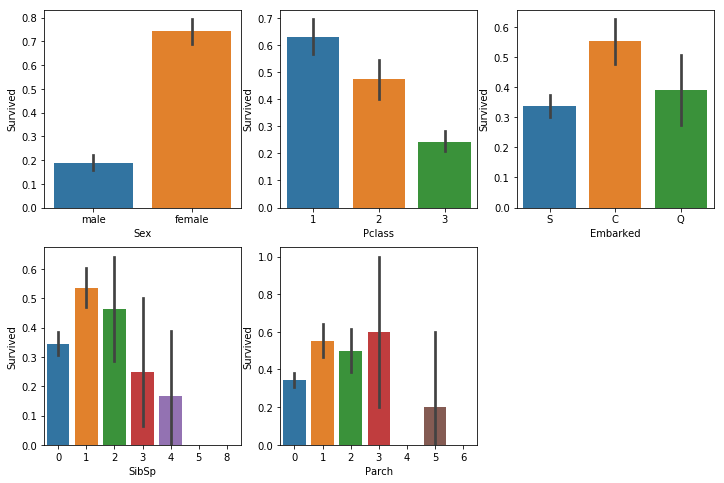

In [7]:
plt.figure(figsize=[12,8])

plt.subplot(231)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(232)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(233)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(234)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(235)
sns.barplot('Parch', 'Survived', data=train)

plt.show()

Let's analyze each feature one by one.

First we look at numerical features.
- Age: The median of survived and not survived are the same at 28 years. Maybe we can't tell the passenger will survive or not by age because both kde graphs are the same except the very young age (0-10). According to our assumption that the rescue may preserve for children first.
- Fare: From median, we can tell that the higher fare have a chance to survive. Maybe the rescue boats are near the high fare cabin.

Then let's see our categorical features.
- Sex: Female has higher rate of survival.
- Pclass: Passenger with Pclass 1 has high rate of survival, follow by Pclass 2 and 3
- Embarked: Passenger embarked at "C" has highest rate of survival. The rate is more than 50% a bit. The others, "S" and "Q" have survive rate almost the same with "Q" is a bit higher.
- SibSp: Passenger with 1 or 2 spouses/siblings have better chance to survive than being alone. If passenger bring them more than 2, the survival rate is less than being alone.
- Parch: Passenger with 1-3 parents/children have better chance to survive than being alone. If passenger bring them more than 3, the rate is lower than being alone.

There are 2 fetaures that we haven't explored yet, "Cabin" and "Ticket".

### Cabin

Train set has 891 rows. The "Cabin" has 687 missing values. In test set "Cabin" has missing values 327 from 418. Calculate the percent of "Cabin" data we have. 

In [8]:
train_cabin_nomiss = (train.shape[0] - train["Cabin"].isnull().sum()) / train.shape[0]
test_cabin_nomiss = (test.shape[0] - test["Cabin"].isnull().sum()) / test.shape[0]

print("number of available Cabin data in train: ", train_cabin_nomiss)
print("number of available Cabin data in test: ", test_cabin_nomiss)

number of available Cabin data in train:  0.228956228956
number of available Cabin data in test:  0.217703349282


The available data is very low. Maybe the process of recording is not good and can't be trust. Don't beleive this assumption yet. We try to find any value in this feature first, so we assume that only survive passenger can tell the cabin. Explore this assumption. 

In [9]:
surv_known_cab = surv[~surv["Cabin"].isnull()]
nosurv_known_cab = no_surv[~no_surv["Cabin"].isnull()]

print("Number of survived passenger who has a known cabin :", surv_known_cab.shape[0])
print("Number of not survived passenger who has a known cabin :", nosurv_known_cab.shape[0])

Number of survived passenger who has a known cabin : 136
Number of not survived passenger who has a known cabin : 68


Focus only known cabin, we can tell that the passenger who has known cabin has a chance to survived more than the passenger with unknown cabin in 136:68 or 2:1. Maybe they record the data again after the tragedy has happened. 

Next we do pick only the first alphabet of cabin to see relationship with survival rate but first let's explore the values in cabin column.

In [10]:
#Select rows that "Cabin" columns have a values.
cab = train[~train["Cabin"].isnull()]
#Some data have multiple cabin number. We separate it first.
cab_list = cab["Cabin"].str.split()
for i in cab_list.index:
    if len(cab_list[i]) > 1:
        print(cab_list[i])

['C23', 'C25', 'C27']
['F', 'G73']
['C23', 'C25', 'C27']
['D10', 'D12']
['B58', 'B60']
['F', 'E69']
['C22', 'C26']
['B58', 'B60']
['C22', 'C26']
['B57', 'B59', 'B63', 'B66']
['C23', 'C25', 'C27']
['B96', 'B98']
['B96', 'B98']
['C23', 'C25', 'C27']
['C22', 'C26']
['B51', 'B53', 'B55']
['F', 'G63']
['C62', 'C64']
['F', 'G73']
['B57', 'B59', 'B63', 'B66']
['B96', 'B98']
['B82', 'B84']
['B96', 'B98']
['B51', 'B53', 'B55']


As the rsult above, you will see some passengers have multiple cabin. Almost of them will have the same first alphabet except the one start with "F". The entries starting with "F" are  ['F', 'G73'], ['F', 'E69'], ['F', 'G63']. We group this as cabin "F". Now we ready to pick the first alphabet.

### Ticket

In [11]:
print("Number of unique ticket: ", train['Ticket'].nunique())
print("Number of all ticket: ", train['Ticket'].count())

Number of unique ticket:  681
Number of all ticket:  891


As result above, number of unique ticket is not equal to the number of all ticket. This mean someone share a ticket. Our assumption is the one who share the ticket may has to chance to survived like the rest of the group who have same ticket. Suggest that the survival rate may depend on number of passenger share same ticket too, we must include this in our analysis.

Here, we make a group of passenger who share the same ticket by "groupby" command. Then collect mean and number of peole share same ticket into list.

In [12]:
group = train.groupby('Ticket')
mean = []
#number of peole share same ticket
num_share = []
for name, g in group:
    #Show only the groups that have more than 1 entries after groupby.
    if len(group.get_group(name)) > 1:
        #print(g.loc[:,['Name', 'Ticket', 'Survived']])
        round_val = round(g["Survived"].mean(), 2)
        num_share.append(len(group.get_group(name)))
        mean.append(round_val)

Next step, we create the dataframe contain number of people and mean

In [13]:
ticket = pd.DataFrame({
'num_people': pd.Series(num_share),
'mean' : pd.Series(mean)}, columns=['num_people', 'mean'])

Then use "groupby" to group same num_people into one group and compute the mean.

In [14]:
ticket.groupby(['num_people'], axis=0).mean()

,mean
num_people,
2,0.574468
3,0.700000
4,0.500000
5,0.000000
6,0.000000
7,0.236667


The result show that 3 passengers who share same ticket have the highest survival rate follow by 2 and 4. 5 and 6 passengers don't survive. Notice that the survival rate improve a bit at 0.237 for 7 people.

## 3) Define parameters
***
Let's define our parameter. We don't want to override the original train and test set, so we can compare with new modify train and test set in later analysis. We construct our parameter here as follow.

In [15]:
# Define 
target = ['Survived']
cat_vars = ['Pclass', 'Sex',  'Embarked']
text_vars = ['Name', 'Ticket', 'Cabin']
num_vars = ['Age', 'Fare', 'SibSp', 'Parch']

There are missing values in train and test set, so we combine train and test into combine and fill missing values all at once. Don't forget to drop 'Survived' which is a target.

In [16]:
train.set_index(['PassengerId'], inplace=True)
test.set_index(['PassengerId'], inplace=True)
combine = pd.concat([train.drop('Survived',1),test])
combine.shape

(1309, 10)

In [17]:
combine.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Set PassengerId as index.

## 4) Deal with missing values
***

### Age
impute age with median

In [18]:
combine['Age'][np.isnan(combine['Age'])] = combine['Age'].median()
print(combine['Age'].isnull().sum())

0


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Embarked
Impute Nan value with 'None'

In [19]:
combine.loc[pd.isnull(combine['Embarked'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
embarked = combine['Embarked'].replace(np.nan, 'None')
combine = combine.assign(Embarked=embarked)

print(combine['Embarked'].isnull().sum())
combine.head()

0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fare

In [21]:
combine['Fare'][np.isnan(combine['Fare'])] = combine['Fare'].median()
print(combine['Fare'].isnull().sum())

0


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Cabin

This column has many missing values (you can see from previous section). We decide not to impute the values.

Finally, this is the summary after filling the missing values. 

In [22]:
combine.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

## 5) Feature extraction
***
From graph above, passenger who travel with 1-2 siblings/spouse has a better rate of survived and the passenger who travel with 1-3 parent/children will has a better rate of survived too.

We create 2 new feature from the conclusion above, "Alone" and "Large family". This 2 feature have lower rate of survive contrast to the passenger who travel with somone as the condition above.

We encode the "Age" in to bin. The bin is "Child", "Teenager", "Adult", "Mid", "Old". We also extract the fisrt letter of the "Cable".

### Age binning
Create a new feature called 'Age_bin'

In [23]:
bins = [0,8,18,45,60,combine['Age'].max()]

age_binned = pd.cut(combine['Age'], bins, labels=['Child', 'Teenager', 'Adult', 'Mid', 'Old']) #pd.cut

# .format is a command to manage print message in python
# print number of passenger n each bin
print('Number of passengers:\n{}'.format(combine['Age'].groupby(age_binned).count()))

combine = combine.assign(Age_bin=age_binned)

Number of passengers:
Age
Child        72
Teenager    121
Adult       961
Mid         122
Old          33
Name: Age, dtype: int64


### Alone

In [24]:
Alone = (combine['SibSp'] + combine['Parch']) == 0
# Alone encoding (Series with 'True' or 'False', can multiply by 1 to mapping to 1 or 0)
Alone = Alone*1
combine = combine.assign(Alone=Alone)

### Large family
from a conclusion above. If passenger travel with more than 2 siblings/spouses or travel with more than 3 parents/children will have lower rate of survived. 

In [25]:
Large_family = (combine['SibSp']>2) | (combine['Parch']>3)
# Large_family encoding (Series with 'True' or 'False', can multiply by 1 to mapping to 1 or 0)
Large_family = Large_family*1
combine = combine.assign(Large_family=Large_family)

### Cabin_cat

From previous section, we conclude that it makes sense to use only first letter of the cabins.

In [26]:
cabin_cats = combine['Cabin'].str[0]
combine = combine.assign(Cabin_cat=cabin_cats)
print('Number of passengers:\n{}'.format(combine['Cabin_cat'].groupby(combine['Cabin_cat']).size()))

Number of passengers:
Cabin_cat
A    22
B    65
C    94
D    46
E    41
F    21
G     5
T     1
Name: Cabin_cat, dtype: int64


### Shared ticket, small and large group
As the previous section analysis, the 2-4 passengers group and 7 passengers group with a shared ticket has a notable survival rate. We construct a small group (2-4 passengers) and large group (7 passengers) sharing the same ticket as new features.

In [27]:
shared_ticket = combine.groupby('Ticket')['Name'].transform('count')
shared_ticket_small = (shared_ticket > 1) & (shared_ticket < 5)
shared_ticket_small = shared_ticket_small*1
shared_ticket_large = shared_ticket > 6
shared_ticket_large = shared_ticket_large*1
combine = combine.assign(Shared_ticket_small=shared_ticket_small)
combine = combine.assign(Shared_ticket_large=shared_ticket_large)

The summary of dataframe after feature extraction is

In [28]:
combine.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Alone,Large_family,Cabin_cat,Shared_ticket_small,Shared_ticket_large
PassengerId,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,0,NaN,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0,0,C,1,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,0,NaN,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0,0,C,1,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1,0,NaN,0,0


## 6) Dummy encoding
***
Here, we use one LabelEncoder and OneHotEncoder to encode the categorical variable which are Pclass, Sex, Cabin_cat and Embarked.

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Pclass encoding
le_pclass = LabelEncoder()
pclass = le_pclass.fit_transform(combine['Pclass'])
# Sex Encoding
le_sex = LabelEncoder()
sex = le_sex.fit_transform(combine['Sex'])
# Embarked encoding
le_embarked = LabelEncoder()
embarked = le_embarked.fit_transform(combine['Embarked'])
# Age_bin encoding
le_age_bin = LabelEncoder()
age_bin = le_age_bin.fit_transform(combine['Age_bin'])
# Cabin_cat encoding
le_cabin_cat = LabelEncoder()
cabin_cat = le_cabin_cat.fit_transform(combine['Cabin_cat'].astype(str))

# Create one hot encoder for all
oh_all = OneHotEncoder(sparse=False, dtype=int)
all_onehot = oh_all.fit_transform(np.stack([pclass,sex,cabin_cat,embarked, age_bin], axis=1))

columns=['Pclass_'+str(c) for c in le_pclass.classes_]
columns+=['Sex_'+str(c) for c in le_sex.classes_]
columns+=['Cabin_cat_'+str(c) for c in le_cabin_cat.classes_]
columns+=['Embarked_'+str(c) for c in le_embarked.classes_]
columns+=[str(c) for c in le_age_bin.classes_]

all_onehot_df = pd.DataFrame(all_onehot, index=combine.index, columns=columns)
all_onehot_df.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_cat_A,Cabin_cat_B,Cabin_cat_C,Cabin_cat_D,Cabin_cat_E,...,Cabin_cat_nan,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Adult,Child,Mid,Old,Teenager
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


Drop all first columns of dummy features.

In [30]:
combine = pd.concat([combine, all_onehot_df], axis =1)

# Drop all the first columns of dummy features 
drop_col=['Pclass_'+str(le_pclass.classes_[0])]
drop_col+=['Sex_'+str(le_sex.classes_[0])]
drop_col+=['Cabin_cat_'+str(le_cabin_cat.classes_[0])]
drop_col+=['Embarked_'+str(le_embarked.classes_[0])]
drop_col+=['Adult']

# Drop similar feature
#drop_col+=['Pclass']
#drop_col+=['Age']
#drop_col+=['Age_bin']
#drop_col+=['Cabin']
#drop_col+=['Cabin_cat']
#drop_col+=['Embarked']

combine = combine.drop(drop_col, axis=1)
combine.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Cabin_cat_G,Cabin_cat_T,Cabin_cat_nan,Embarked_None,Embarked_Q,Embarked_S,Child,Mid,Old,Teenager
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,...,0,0,1,0,0,1,0,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,...,0,0,0,0,0,0,0,0,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,0,0,1,0,0,1,0,0,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,...,0,0,0,0,0,1,0,0,0,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,...,0,0,1,0,0,1,0,0,0,0


## 7) Relationship between features
***
Pick the process train set and concatenate with our target "Survived". Then visualize the relationship both old and new features with correlation matrix. This will tell us beforehand our feature is good or not.

In [31]:
# train set is index 1-891
process_train = combine.loc[1:891]
process_train = pd.concat([process_train, train['Survived']], axis=1)

We plot correlation matrix. Positive correlation is the value close to 1 (White) and Negative correlation is the value near -1 (Black). The value around 0 mean there is no correlation. Our objective here is to find the features that has a stronger correlation with our target "Survived".

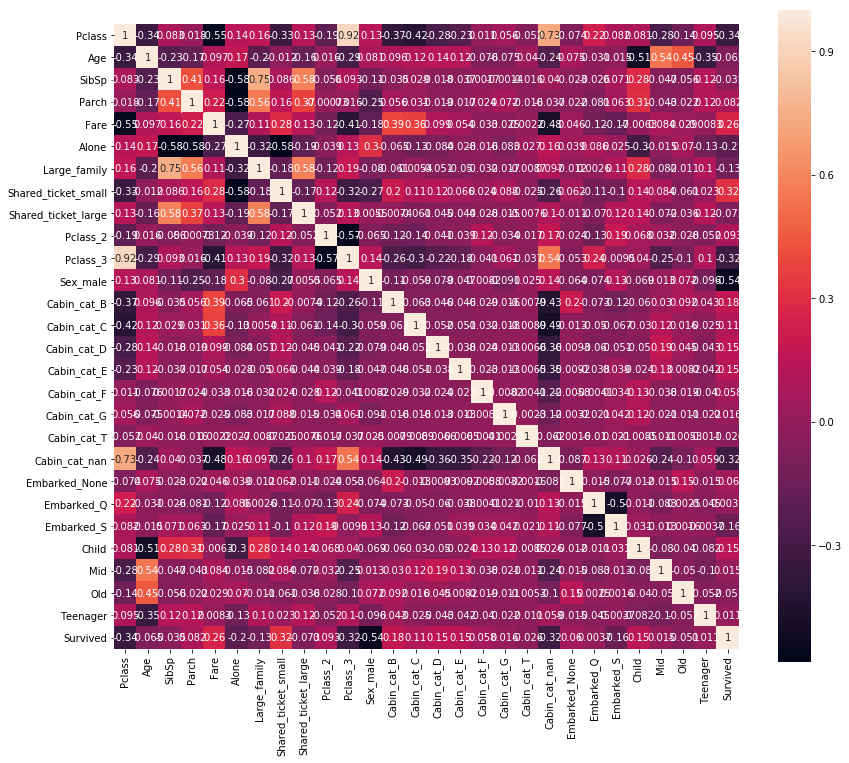

In [32]:
plt.figure(figsize=(14,12))
# for purple shade use cmap, adding cmap as the lastest parameter in foo
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
foo = sns.heatmap(process_train.corr(), square=True, annot=True)
plt.show()

## 8) Select features for training
***
Create X and y from the process train set

In [33]:
# train set
X = process_train.drop('Survived', axis=1)
# target
y = process_train['Survived']

List all of train set column. Select useful column from the list. Drop similar column to prevent overfitting in some model.

In [34]:
list(X.columns.values)

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_bin',
 'Alone',
 'Large_family',
 'Cabin_cat',
 'Shared_ticket_small',
 'Shared_ticket_large',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Cabin_cat_B',
 'Cabin_cat_C',
 'Cabin_cat_D',
 'Cabin_cat_E',
 'Cabin_cat_F',
 'Cabin_cat_G',
 'Cabin_cat_T',
 'Cabin_cat_nan',
 'Embarked_None',
 'Embarked_Q',
 'Embarked_S',
 'Child',
 'Mid',
 'Old',
 'Teenager']

Select features to train our model

In [35]:
X = X[['Fare', 'Alone', 'Large_family', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Cabin_cat_B', 
       'Cabin_cat_C', 'Cabin_cat_D', 'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G', 
       'Cabin_cat_T', 'Cabin_cat_nan', 
       'Embarked_None', 'Embarked_Q', 'Embarked_S', 'Child', 'Mid', 'Old', 'Teenager']]

In [36]:
X.head()

,Fare,Alone,Large_family,Pclass_2,Pclass_3,Sex_male,Cabin_cat_B,Cabin_cat_C,Cabin_cat_D,Cabin_cat_E,...,Cabin_cat_G,Cabin_cat_T,Cabin_cat_nan,Embarked_None,Embarked_Q,Embarked_S,Child,Mid,Old,Teenager
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,71.2833,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.9250,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,53.1000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,8.0500,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## 9) Scaling
***
Apply standard scaling on some features.

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## 10) Train model using XGBoost
***

In [38]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Create parameter to use with GridSearchCV

In [39]:
param_grid = {
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': [50],
    'max_depth': np.arange(3, 10, 1)
}

Create GridSearchCV object

In [40]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(param_grid=param_grid, estimator=xgb, scoring="roc_auc", cv=3, verbose=1)

Fit the data

In [41]:
grid.fit(X, y)

Fitting 3 folds for each of 133 candidates, totalling 399 fits


[Parallel(n_jobs=1)]: Done 399 out of 399 | elapsed:   27.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19]), 'n_estimators': [50], 'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

Print best score and best estimator

In [42]:
print("Best score: ", grid.best_score_)
print("Best estimator: ", grid.best_estimator_)
print("Best parameter: ", grid.best_params_ )

Best score:  0.866439778864
Best estimator:  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.13, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Best parameter:  {'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 50}


Predict the result

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = grid.predict(X)
conf_mat_sklearn = confusion_matrix(y, y_pred)

In [44]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision_sklearn = precision_score(y, y_pred)
recall_sklearn = recall_score(y, y_pred)
f1_sklearn = f1_score(y, y_pred)
accuracy_sklearn = accuracy_score(y, y_pred)

print("\nConfusion matrix")
print(conf_mat_sklearn)
print('\n')

print("Precision: ", precision_sklearn)
print("Recall: ", recall_sklearn)
print("F1: ", f1_sklearn)
print("Accuracy: ", accuracy_sklearn)


Confusion matrix
[[518  31]
 [ 95 247]]


Precision:  0.888489208633
Recall:  0.722222222222
F1:  0.796774193548
Accuracy:  0.858585858586


## 11) Predict test set
***

Process test set first

In [45]:
process_test = combine.loc[892:]

Select same feature as train set. Then scale its feature.

In [46]:
test = process_test[['Fare', 'Alone', 'Large_family', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Cabin_cat_B', 
       'Cabin_cat_C', 'Cabin_cat_D', 'Cabin_cat_E', 'Cabin_cat_F', 'Cabin_cat_G', 'Cabin_cat_T',
       'Cabin_cat_nan', 'Embarked_None', 'Embarked_Q', 'Embarked_S', 'Child', 'Mid', 'Old',
       'Teenager']]

In [47]:
#test_scaled = sc.fit_transform(test)

Predict the result

In [48]:
y_test = grid.predict(test)

Cast into dataframe as format of submission file

In [49]:
submission = pd.DataFrame({'PassengerId': test.index.values, 
                       'Survived': y_test
                      })

Save a submission to .csv file

In [50]:
submission.to_csv('submission.csv', index=False)

# Conclusion
***
After submit a file to Kaggle, the result is 0.77990 (without scaling X in train set). Some Kagglers say that the train dataset has a different distribution than the test/validation dataset and population. This created wide margins between the cross validation (CV) accuracy score and Kaggle submission accuracy score. We can try improve our model a bit by feature engineering more, changing a method to fill missing values or tuning our model further.